<a href="https://colab.research.google.com/github/crweber9874/crossLag/blob/main/The_Cross_Lag_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Cross Lagged Regression Model

It is difficult to sort out causal mechanisms with cross-sectional observational data, panel and cross sectional. Causal relationships require careful theorizing about the data generating process. Data, particularly when observational, and statistical procedures do not guarantee that researcher will identify a causal mechanism.

Yet, it is not uncommon for researchers to use statistical techniques to identify causal mechanisms, occasionally with very little theorizing about the data generating process. One such statistical technique is the cross-lagged panel model (CLPM). The CLPM is a variant of the Autoregressive Distributed Lag model used in econometrics, and the identified causal mechanism is a particular type of causality, Granger Causality. The reasoning is both simple and elegant. The notion is that if one measures $x$ at time $t-1$ and $t$, and $y$ at time $t-1$ and $t$, then one estimates a model that predicts $y_{t}$ from $x_{t-1}$ and $y_{t-1}$, and an additional model where $x_{t}$ is predicted from $y_{t-1}$ and $x_{t-1}$. The temporal ordering of the data is then used to identify causal relationships. Although one may not be able to manipulate $x$ and $t$ -- to rule out spurious relationships -- if $x$ measured in the past predicts $y$ in the present, but $y$ measured in the past doesn't predict $x$ in the present, one can be reasonably certain that the causal ordering is such that $x$ affects $y$ and $y$ does not affect $x$.


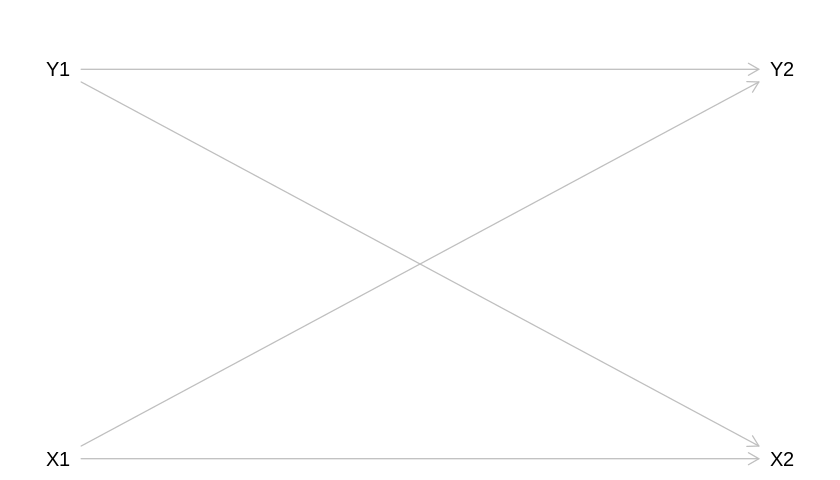

In [20]:
options(repr.plot.width = 2, repr.plot.height = 2)  # Set smaller plot size
library(dagitty)

g <- dagitty("dag {
    X1 -> Y2
    Y1 -> Y2
    X1 -> X2
    Y1 -> X2

}")
coordinates(g) <- list(
    x = c(U1 = 0.5, Y1 = 1, X1 = 1, Y2 = 2, X2 = 2, U2 = 3),
    y = c(U1 = 1.5, Y1 = 1, X1 = 2, Y2 = 1, X2 = 2, U2 = 2.5)
)

# Set plot size
par(mfrow = c(1, 1), mar = c(4, 4, 2, 2), oma = c(0, 0, 2, 0))
options(repr.plot.width = 7, repr.plot.height = 4)  # Adjust plot size

# Plot the DAG
plot(
  g,
  cex = 2,
  col = "black",
  lwd = 2,
  main = "Directed Acyclic Graph (DAG)"
)



In [ ]:
#devtools::install_github("crweber9874/crossLag")
library(crossLag)
library(semPlot)

install.packages('semPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘coda’, ‘GPArotation’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘arm’, ‘minqa’, ‘nloptr’, ‘openxlsx’, ‘RUnit’, ‘mvtnorm’, ‘psych’, ‘Hmisc’, ‘jpeg’, ‘png’, ‘reshape2’, ‘glasso’, ‘fdrtool’, ‘gtools’, ‘pbapply’, ‘abind’, ‘mi’, ‘lme4’, ‘carData’, ‘kutils’, ‘RcppParallel’, ‘StanHeaders’, ‘BH’, ‘rpf’, ‘qgraph’, ‘sem’, ‘plyr’, ‘XML’, ‘igraph’, ‘lisrelToR’, ‘rockchalk’, ‘corpcor’, ‘OpenMx’




In [ ]:
#devtools::install_github("crweber9874/crossLag")
library(crossLag)

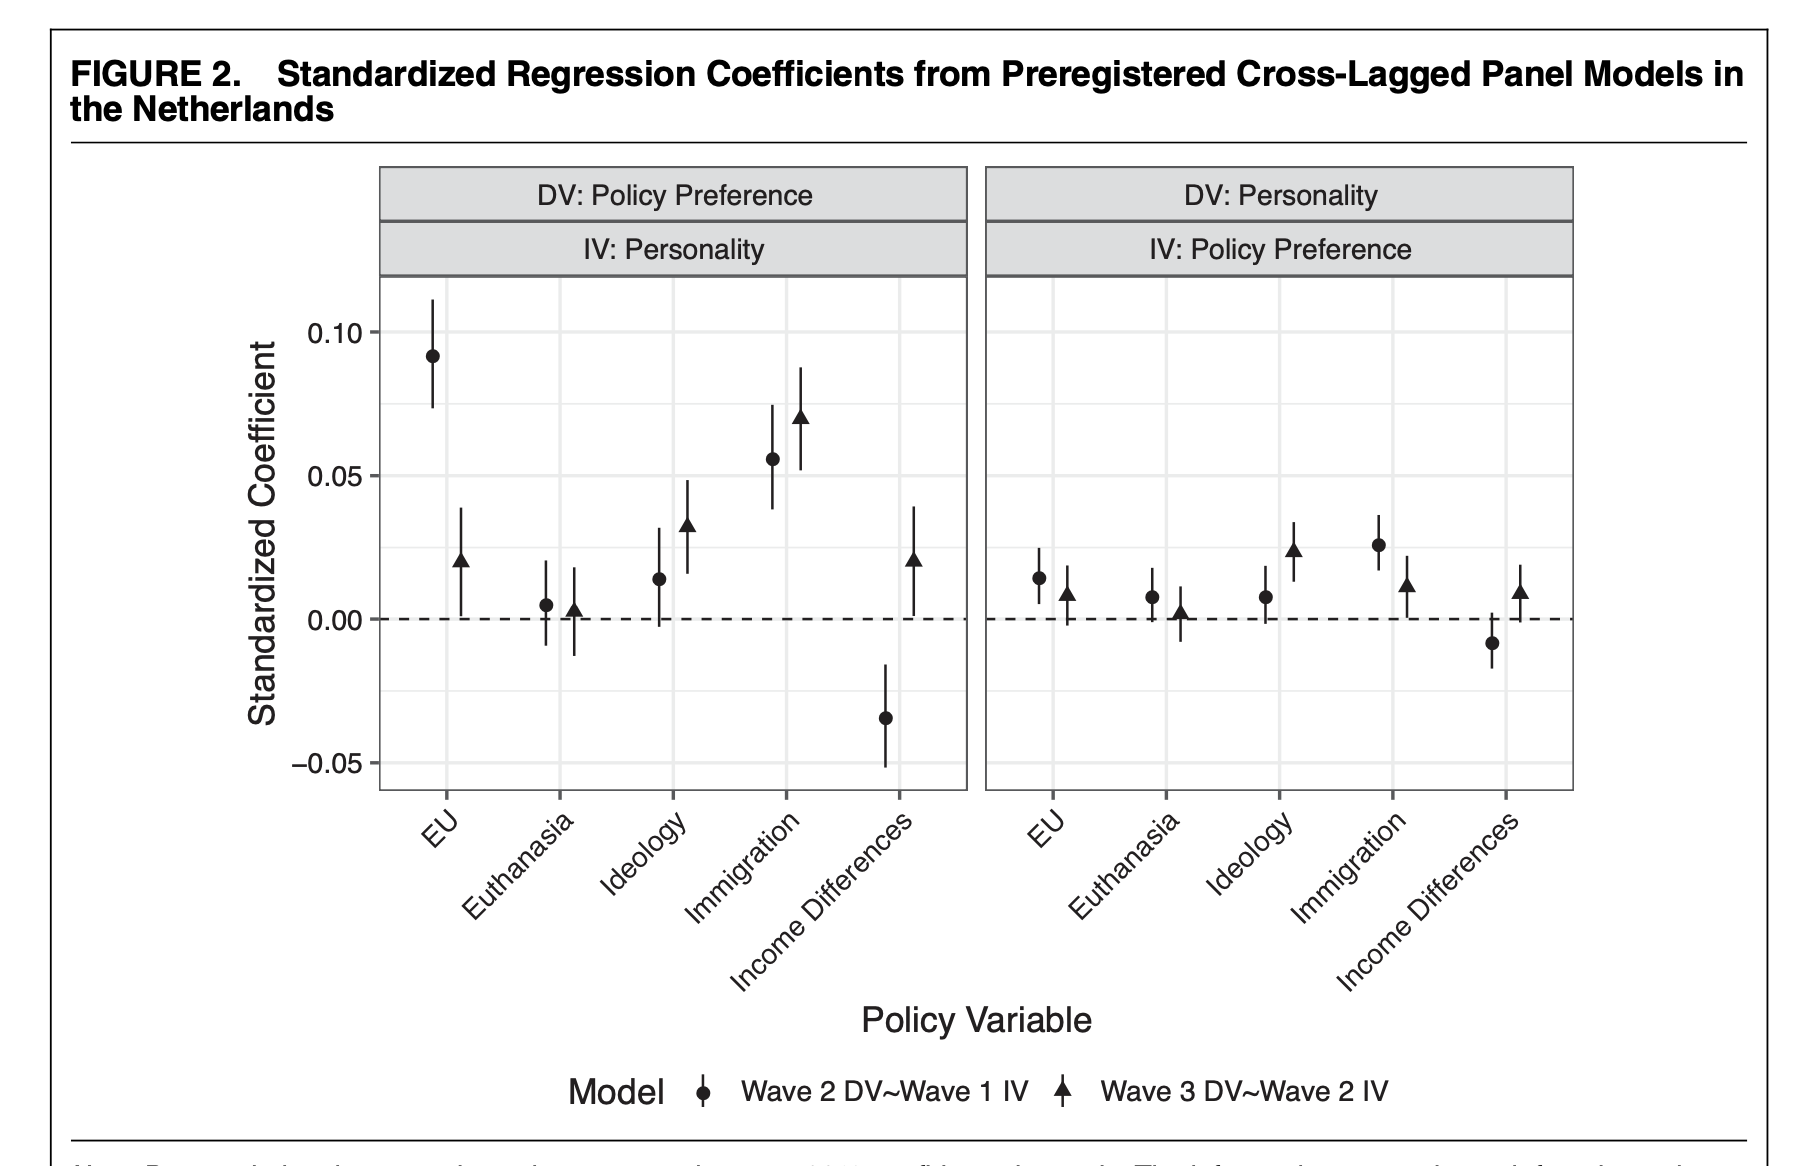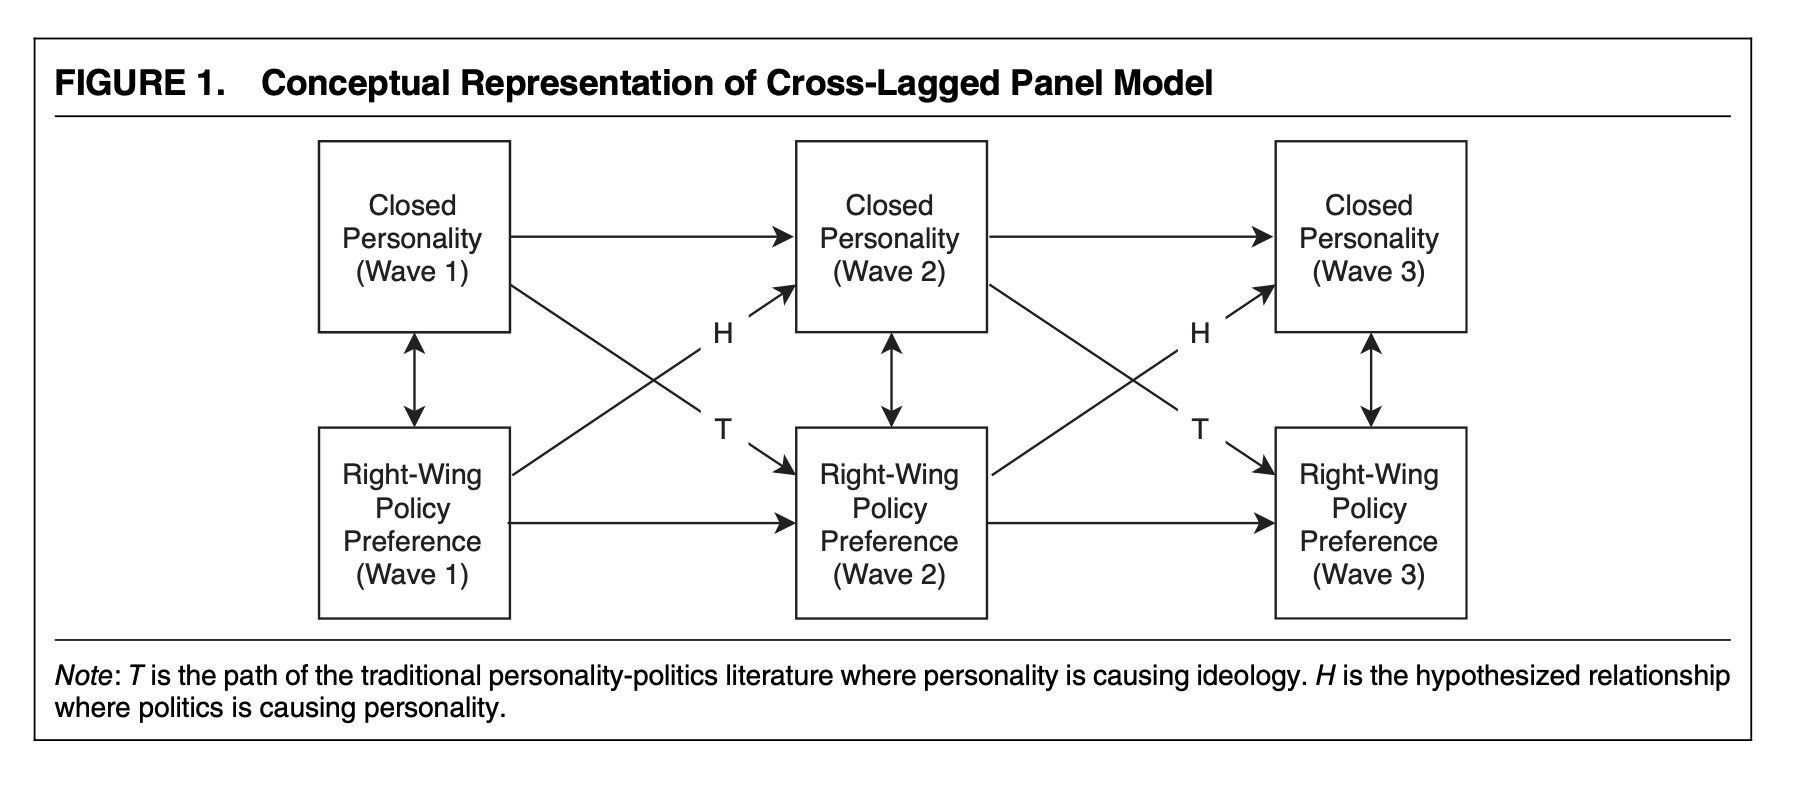

Let's use two useful functions in **crossLag**
* **simulate_ricplm()**: Simulate data from a random intercept cross lagged regression
* **model_syntax_clpm()** Generate the lavaan syntax to estimate the CLPM or RI-CLPM

In [ ]:
data = simulate_riclpm(
  waves = 10,
  stability.p = 0.5,
  stability.q = 0.5,
  cross.p = 0.1,
  cross.q = 0.1,
  variance.p = 1,
  variance.q = 1,
  cov.pq = 0.25,
  beta.u = 0.01,
  sample.nobs = 2000)$data
head(data)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,y2,y3,y4,y5,y6,y7,y8,y9,y10,U
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.11913004,0.6390482,4.5360868,-0.2798296,-0.5455267,-0.3173448,1.0955428,0.1066830,0.07008865,0.2645088,⋯,0.3459369,1.090592,1.28156131,1.2429906,-1.07443636,-0.2703264,-2.0089558,-0.2829836,-0.4561666,-0.16967381
2,2.13660041,-1.2243661,-2.2144354,0.4741810,-1.8524263,-1.9563446,-0.1020274,-0.5111486,2.83971338,1.1409456,⋯,-0.6587324,1.964630,0.87203147,1.8846064,1.01063439,2.3117148,-0.1257112,0.5262062,3.3247871,0.09605394
3,4.78634348,3.0166709,-0.2753198,1.6628326,-1.1360663,-1.3666606,-0.6337137,-0.3266985,1.55367838,0.6948308,⋯,1.1940663,0.839586,0.95440063,0.5179028,0.77652949,-0.3521768,0.7734144,3.6905322,1.5155957,0.02256841
4,-1.72463594,-2.2659461,-1.3676027,-2.7617427,0.1278973,0.4053331,-3.6091662,0.9985519,-0.53711338,-2.8920603,⋯,-0.5324754,-4.310502,-1.91069200,-3.1094820,-1.96584681,-2.9198050,-1.5853886,-1.8302580,0.7040188,-0.05172375
5,-0.06721387,-1.0095163,-0.8941001,-0.2101488,-0.9809891,2.0086242,0.7747542,2.0310883,1.72681465,-1.3914843,⋯,-2.4708457,-2.686088,-1.66489304,-2.1831562,-0.02504809,-0.8196083,2.1931309,-1.1761812,0.6466033,0.18455054
6,1.41329987,2.2471670,-0.4067826,-2.1357759,0.1348161,-1.3701778,-1.0913162,1.1634253,1.29083192,2.4300897,⋯,3.5132516,1.591437,0.08358011,0.1126530,-0.10415658,-2.2090142,-0.4780811,-2.2293603,1.4520426,-0.15154300


In [ ]:
cat(model_syntax_clpm(waves = 3, model_type = "clpm")) # ri-clpm frees var-cov for omega and kappa, the intercepts


kappa =~ 1* x1 + 1 * x2 + 1 * x3
 omega =~ 1* y1 + 1 * y2 + 1 * y3
kappa ~~0 * kappa
                                         
omega ~~0* omega
                                         
kappa ~~0* omega
p1 =~ 1*x1
q1 =~ 1*y1
p2 =~ 1*x2
q2 =~ 1*y2
p3 =~ 1*x3
q3 =~ 1*y3
 p3 ~   p2 +   q2
 q3 ~   q2 +   p2
 p2 ~   p1 +   q1
 q2 ~   q1 +   p1
p1 ~~   p1 
 q1 ~~   q1 
 p1 ~~   q1
 p2 ~~ 1* p2
 q2 ~~   1 * q2
 p2 ~~   q2
 p3 ~~ 1* p3
 q3 ~~   1 * q3
 p3 ~~   q3

In [ ]:
model = model_syntax(waves = 3, model_type = "clpm")

ERROR: Error in model_syntax(waves = 3, model_type = "clpm"): could not find function "model_syntax"
